<a href="https://colab.research.google.com/github/sshota98/Prog2kakushin/blob/main/work3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **準備1**

In [1]:
!wget "https://drive.google.com/uc?export=download&id=1CEjbXFpYVbfdOSoKsTzmyhp3rW2bE45F" -O heritage.zip
!unzip -o heritage.zip

--2024-01-23 06:56:17--  https://drive.google.com/uc?export=download&id=1CEjbXFpYVbfdOSoKsTzmyhp3rW2bE45F
Resolving drive.google.com (drive.google.com)... 142.250.97.101, 142.250.97.138, 142.250.97.100, ...
Connecting to drive.google.com (drive.google.com)|142.250.97.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1CEjbXFpYVbfdOSoKsTzmyhp3rW2bE45F&export=download [following]
--2024-01-23 06:56:17--  https://drive.usercontent.google.com/download?id=1CEjbXFpYVbfdOSoKsTzmyhp3rW2bE45F&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.210.132, 2607:f8b0:400c:c0f::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.210.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28462 (28K) [application/octet-stream]
Saving to: ‘heritage.zip’

heritage.zip        100%[===================>]  27.79K  --.-KB/s   

# **準備2**

In [2]:
import numpy as np
import sys
import cv2
import glob
import random
from google.colab.patches import cv2_imshow
mydict=dict()
count1=0
theme=input('どのテーマのクイズですか（例を実行しているときは世界遺産と入力してください）')
def mozaiku(answer2,k):
  scale=k
  h, w = answer2.shape[:2]
  moz=cv2.resize(answer2, dsize=None, fx=scale, fy=scale, interpolation=cv2.INTER_NEAREST)
  moz = cv2.resize(moz, dsize=(w*2, h*2), interpolation=cv2.INTER_NEAREST)
  return moz
file_list = glob.glob('*.jpg')
print(file_list)
for x in (file_list):
  answername=input(f'{x}の答えを教えてください')
  mydict[x]=answername
print(mydict)




どのテーマのクイズですか世界遺産
['gennbakudo-mu.jpg', 'himejijyou.jpg', 'itukushima.jpg']
gennbakudo-mu.jpgの答えを教えてください原爆ドーム
himejijyou.jpgの答えを教えてください姫路城
itukushima.jpgの答えを教えてください厳島神社
{'gennbakudo-mu.jpg': '原爆ドーム', 'himejijyou.jpg': '姫路城', 'itukushima.jpg': '厳島神社'}


## **実践**

モザイク世界遺産クイズ


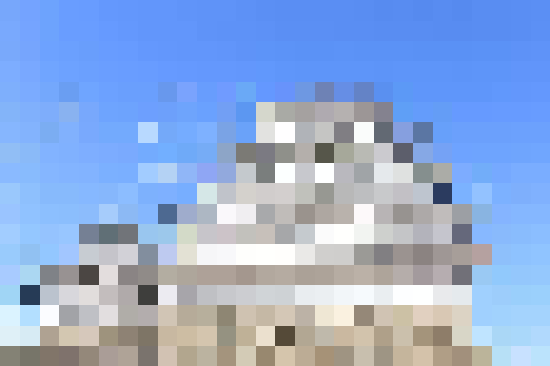

これはなんでしょう：わからない


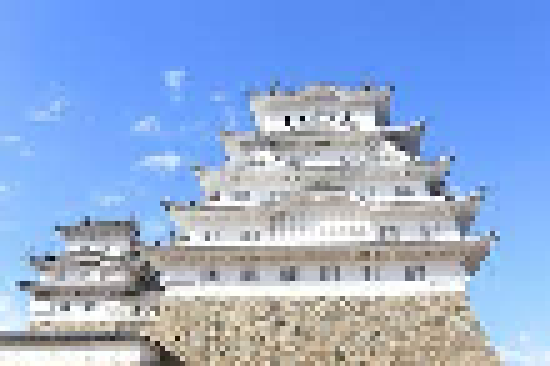

これはなんでしょう：姫路城
正解です


In [5]:
print(f'モザイク{theme}クイズ')
answer=random.choice(file_list)
scale=0.1
answer2 = cv2.imread(answer)
if answer2 is None:
  sys.exit(f'エラー: ファイルを開けませんでした {answer}')
def gazou():
  global answer2
  global scale
  answer3=mozaiku(answer2,scale)
  cv2_imshow(answer3)
gazou()
while True:
  a=input('これはなんでしょう：')
  b=mydict[answer]
  if a==b:
    print('正解です')
    break
  elif scale>=0.9:
    print('不正解')
    print(f'正解は{b}')
    break
  else:
    scale+=0.3
    gazou()
    continue
file_list.remove(answer)
mydict.pop(answer)
if len(file_list)==0:
  print('全問終了しました')
